In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessawang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanessawang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("reviews-3.csv")

In [18]:
df.isna().sum()

Unnamed: 0       0
Reviewer Name    0
Star Ratings     0
Review Titles    0
Reviews          3
Review Dates     0
dtype: int64

In [19]:
df.head()

,Unnamed: 0,Reviewer Name,Star Ratings,Review Titles,Reviews,Review Dates
0,0,Nlitend Theory,4.7,Another piece of junk,Another piece of junk. The wheel does not scro...,March 6 2022
1,1,Sobe,5.0,The best mouse EVER!!!,"Seriously nice, smooth and quiet mouse! Best f...",June 21 2022
2,2,JJ.,3.0,It works without software.,It will plug and play for the side scroll feat...,December 3 2022
3,3,ZikG,1.0,The New Bolt Receiver is Laggy,I've been using Master Mx mouse since they wer...,December 2 2022
4,4,Dirk Gently,5.0,BEST MOUSE EVER!,I loved this mouse so much!!! I bought one for...,December 1 2022


In [20]:
df.tail()

,Unnamed: 0,Reviewer Name,Star Ratings,Review Titles,Reviews,Review Dates
995,995,charon,5.0,comfortable shape,Replacing my G500 that after a decade doesn't ...,November 25 2021
996,996,Nlitend Theory,5.0,Not so great,I’m not a fan. It’s big and bulky. It doesn’t ...,March 6 2022
997,997,Sobe,4.7,Nice mouse - too bad it's not wired,First off I was using this mouse on a Windows ...,June 21 2022
998,998,Chris Wallington,5.0,"Great product. Expensive, but worth it.",Simply great,November 24 2021
999,999,Marc M.,3.0,10/10 Recommend,Absolutely love this mouse. About to start a n...,November 24 2021


In [21]:
text = df.Reviews[0:999]
#text= " ".join(str(review for review in df.Reviews))
print("there are {} words in the combinatiom of all reviews.".format(len(text)))


there are 999 words in the combinatiom of all reviews.


In [22]:
#stopwords = set(STOPWORDS)


In [23]:
wordcloud = WordCloud(max_words=500, background_color="white").generate(str(text))

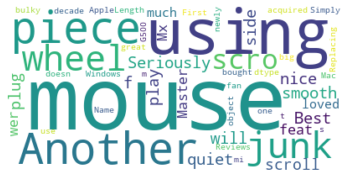

In [24]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
#sentiment analysis
df.loc[df['Star Ratings']<=3, 'Sentiment'] = 0
df.loc[df['Star Ratings']>3, 'Sentiment'] = 1

In [30]:
df.head()

,Unnamed: 0,Reviewer Name,Star Ratings,Review Titles,Reviews,Review Dates,Sentiment
0,0,Nlitend Theory,4.7,Another piece of junk,Another piece of junk. The wheel does not scro...,March 6 2022,1.0
1,1,Sobe,5.0,The best mouse EVER!!!,"Seriously nice, smooth and quiet mouse! Best f...",June 21 2022,1.0
2,2,JJ.,0.0,It works without software.,It will plug and play for the side scroll feat...,December 3 2022,0.0
3,3,ZikG,0.0,The New Bolt Receiver is Laggy,I've been using Master Mx mouse since they wer...,December 2 2022,0.0
4,4,Dirk Gently,5.0,BEST MOUSE EVER!,I loved this mouse so much!!! I bought one for...,December 1 2022,1.0


In [32]:
df['Sentiment'].value_counts()

1.0    709
0.0    291
Name: Sentiment, dtype: int64

In [35]:
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
					split() if word not in stp_words)
    return cleanreview

df['Reviews']=df['Reviews'].apply(clean_review)



AttributeError: 'float' object has no attribute 'split'

In [1]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#stopword operations
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# word_tokenize accepts
# a string as an input, not a file.
stop_words = set(stopwords.words('english'))
file1 = open("reviews-3.csv")

# Use this to read file content as a stream:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('filteredtext.txt','a')
        appendFile.write(" "+r)
        appendFile.close()



In [17]:

with open("filteredtext.txt") as f:
    for line in f:
        print(line.strip())

,Reviewer Name,Star Ratings,Review Titles,Reviews,Review Dates 0,Nlitend Theory,4.7,Another piece junk,Another piece junk. The wheel scroll properly I started “jittery episodes” mouse would lag time. Save headache.,March 6 2022 1,Sobe,5.0,The best mouse EVER!!!,"Seriously nice, smooth quiet mouse! Best price range office professional work. Even gaming. It's good I've typed review using exact mouse... ok ok really close.",June 21 2022 2,JJ.,3.0,It works without software.,"It plug play side scroll feature. For locked work computers/secure IT environments permit standalone mice. It try prompt download logi software, doesn’t need function fully.My work allows personal mice non air gapped computers none enterprise software blocked functioning fully.That side scrolling amazing get used you’ll never able go back.",December 3 2022 3,ZikG,1.0,The New Bolt Receiver Laggy,"I've using Master Mx mouse since first released never issues unifying receiver, new Bolt Receiver laggy unless receiver plugg

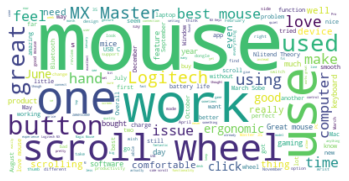

In [20]:

wordcloud = WordCloud(background_color="white").generate(str(line.strip()))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()